In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

df=pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [108]:
data=df.values
X=data[:,0:-1].astype(float)
Y_real=data[:,-1]

In [116]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
lb=LabelBinarizer()
X = StandardScaler().fit_transform(X)
Y = lb.fit_transform(Y_real)

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

30/30 [==============================] - 0s 77us/step
Epoch:  200
acc: 93.33333373069763%
30/30 [==============================] - 0s 84us/step
Epoch:  210
acc: 96.66666388511658%
30/30 [==============================] - 0s 81us/step
Epoch:  220
acc: 93.33333373069763%
30/30 [==============================] - 0s 84us/step
Epoch:  230
acc: 96.66666388511658%
30/30 [==============================] - 0s 95us/step
Epoch:  240
acc: 96.66666388511658%
30/30 [==============================] - 0s 620us/step
Epoch:  250
acc: 96.66666388511658%
30/30 [==============================] - 0s 79us/step
Epoch:  260
acc: 96.66666388511658%
30/30 [==============================] - 0s 535us/step
Epoch:  270
acc: 96.66666388511658%
30/30 [==============================] - 0s 537us/step
Epoch:  280
acc: 96.66666388511658%
30/30 [==============================] - 0s 72us/step
Epoch:  290
acc: 96.66666388511658%


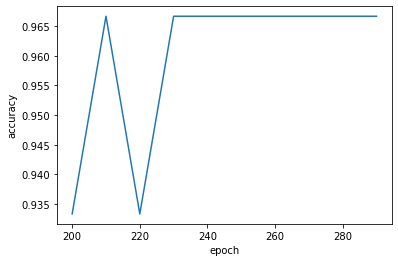

In [126]:
#Model
model = Sequential()
model.add(Dense( 20, input_dim=4, activation = 'relu'))
model.add(Dense( units = 15, activation= 'relu'))
model.add(Dense( units = 8, activation= 'relu'))
model.add(Dense( units = 10, activation= 'relu'))
model.add(Dense( units = 3, activation= 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#4. Fit the model
ac=[]
ep=[]
for i in range(10,20):
    model.fit(x_train, y_train, epochs = 100+10*i, validation_data = (x_test, y_test),verbose=0)
    #5. Evaluate the model
    scores=model.evaluate(x_test,y_test)
    ep.append(100+10*i)
    ac.append(scores[1])
    print('Epoch: ',100+10*i)
    print('{}: {}%'.format(model.metrics_names[1],scores[1]*100))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(ep,ac)

In [127]:
Y_hat=np.round(model.predict(x_test[0:5]))
lb.inverse_transform(Y_hat)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor'], dtype='<U15')

In [128]:
lb.inverse_transform(y_test[0:5])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor'], dtype='<U15')